In [1]:
import octopus
import cubetools.plotters as cubeplot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
outputevery = 50
path = './output_iter/'
dbond = 2

# coro contains
# time,field,dipole,forces,torque,alfa,omega,theta,charge,energy,mudot,muddot,torquepersite,muabs

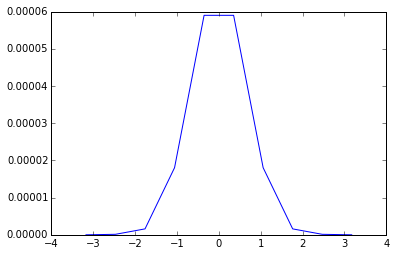

In [6]:
# Find profile of currents vs. z for planar molecule

import cubetools.cube as cube
cube1,coords = cube.genGrid(path+'td.0000000/current-sp1-x.cube')
zmax = cube1.z.max()
zmin = cube1.z.min()

zi = np.linspace(zmin,zmax,10)
maxcurr = []
for z in zi:
    x0,y0,ix0,iy0 = octopus.currentXY(path,step,outputevery,z,npts=100)
    maxcurr.append(np.hypot(ix0,iy0).max())
maxcurr = np.array(maxcurr)
plt.plot(zi,maxcurr)

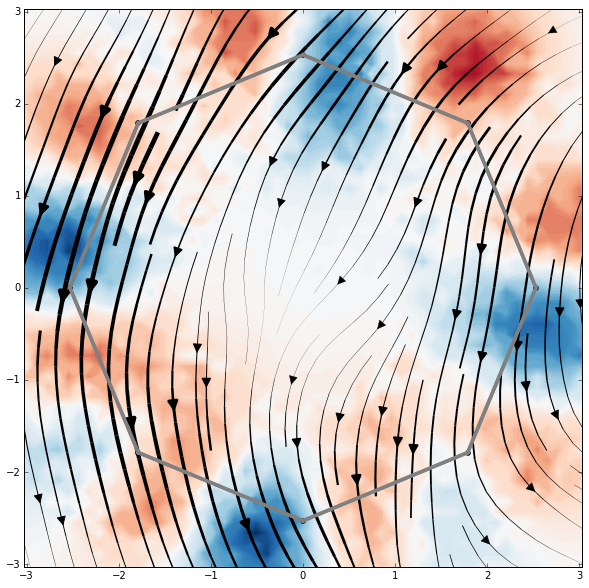

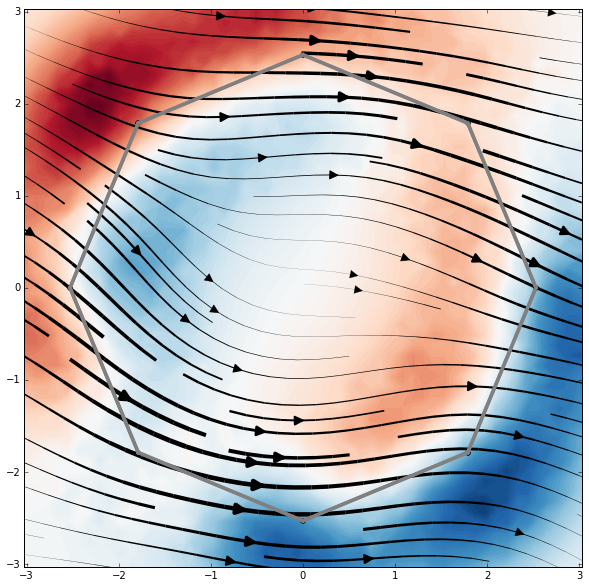

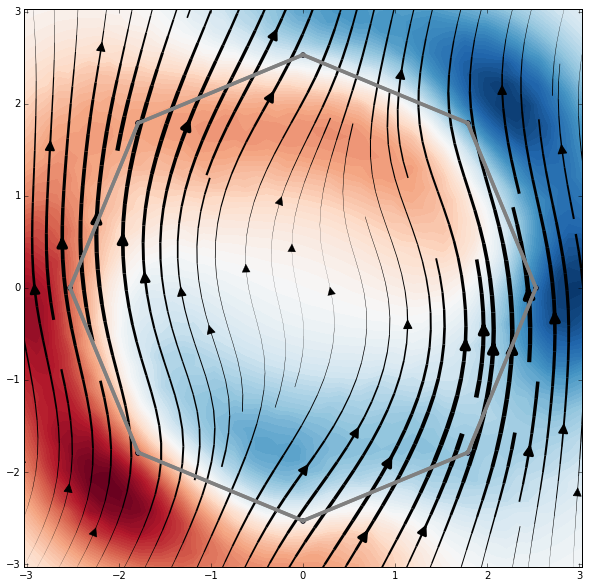

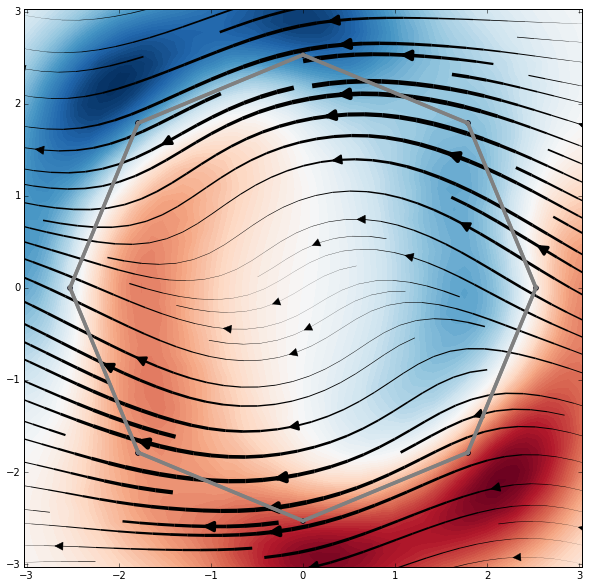

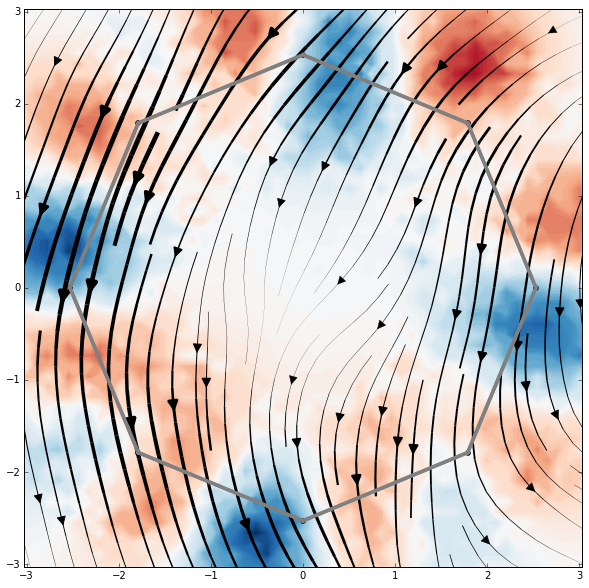

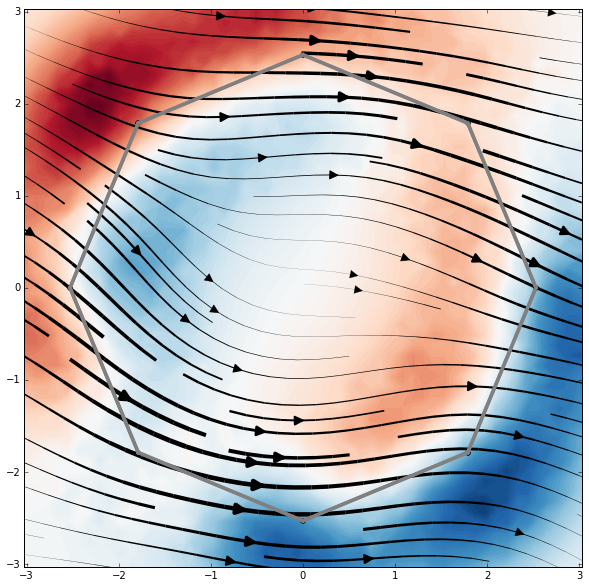

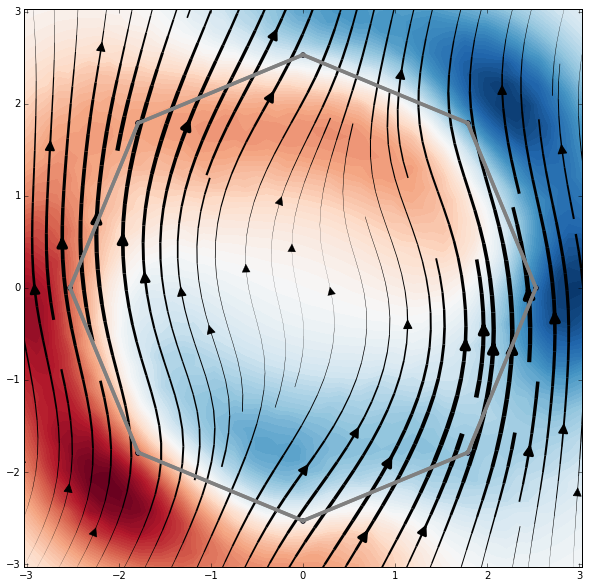

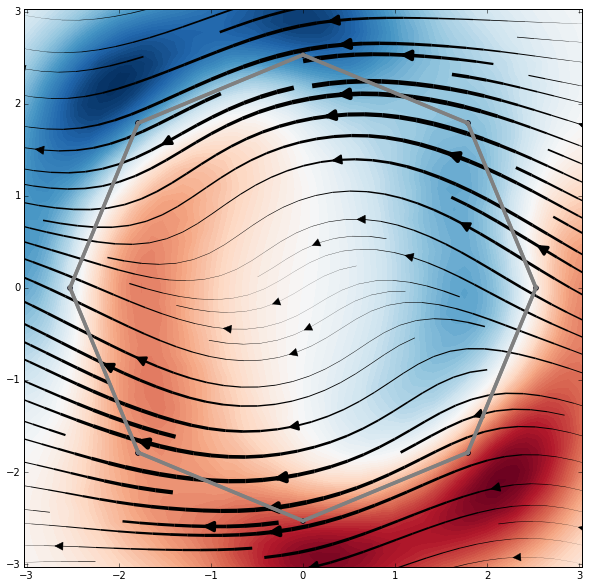

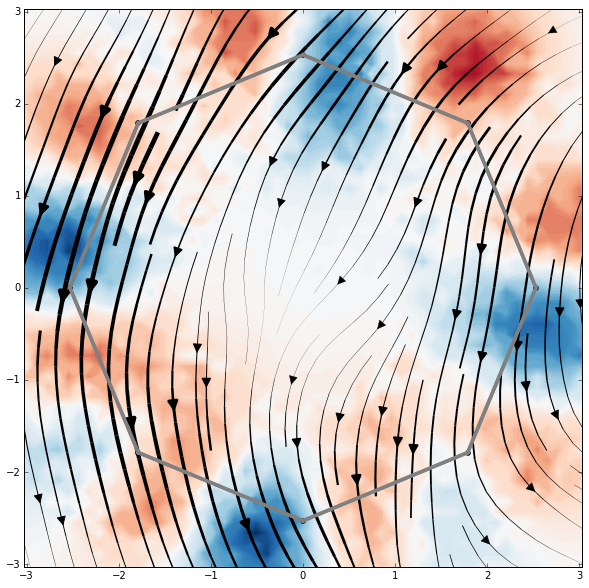

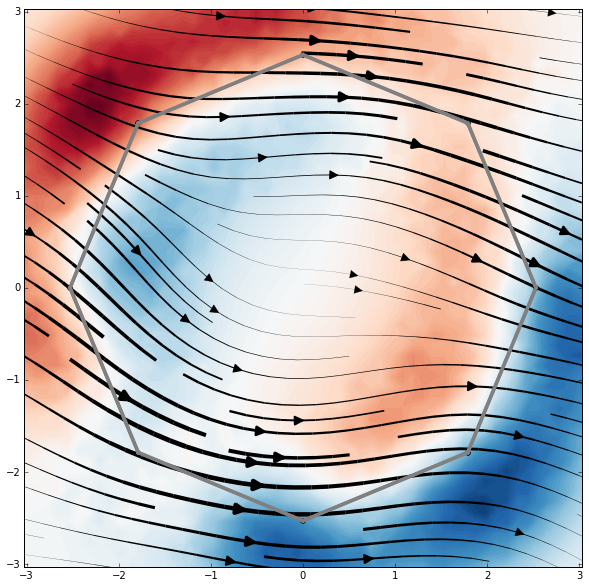

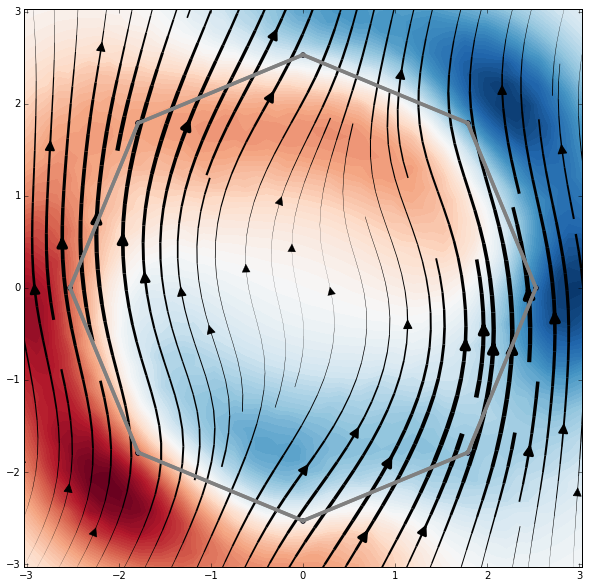

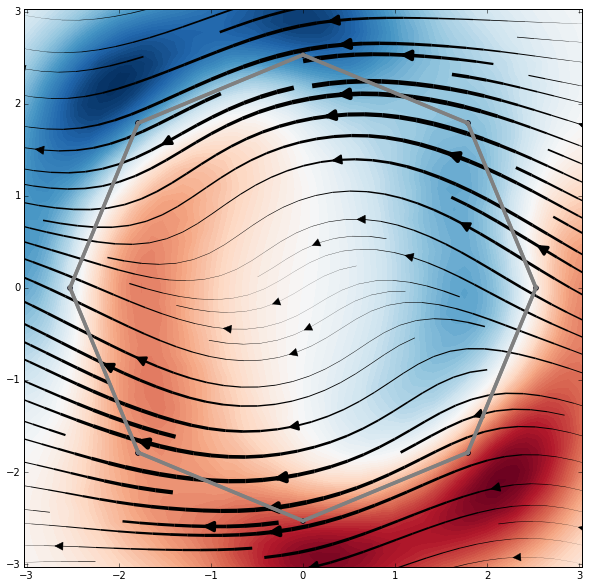

In [5]:
# Define times at which plot current and density
omega = 1.69324 # from input
periodo = 2*np.pi/omega * 0.658 # in fs
times = [periodo/4,periodo/2,periodo*3/4,periodo]

#Plot current and density for these times
coords = octopus.coords(path)
for z in [-1,0,1]:
    for i in range(len(times)):
        z0 = 1.
        time = times[i]
        x0,y0,ix0,iy0 = octopus.currentXY(path,time,z0, npts=100)
        x1,y1,dens = octopus.densityXY(path,time,z0, npts=100)

        fig, ax = plt.subplots(figsize=(10,10))
        cubeplot.plotDens(ax,x1,y1,dens)
        cubeplot.plotCurrentBlack(ax,x0,y0,ix0,iy0,coords)
        cubeplot.plotPlanarMol(coords[0],coords[1],dbond)
        #ax.set(title='Time = '+str(time))
        fig.savefig('cd_'+str(z)+'_'+str(i)+'.eps')

In [25]:
myRun = octopus.loadData(outputevery,path)
ex = myRun.field[0]
ey = myRun.field[1]
mux = myRun.mu[0]
muy = myRun.mu[1]
mu = myRun.muabs
mudot = myRun.mudot
muddot = myRun.muddot
alfa = myRun.alfa
omega = myRun.omega
theta = myRun.theta
torque = myRun.torque
forces = myRun.forces
time = myRun.time
muphi = myRun.muphi
energy = myRun.energy
charge = myRun.charge

In [24]:
xlim=20
xra = np.linspace(0,xlim,1000)
plt.figure(figsize=(10,10))
plt.plot(time,ex,'-b',label='$E_x$',linewidth=2)
plt.plot(time,ey,'-r',label='$E_y$',linewidth=2)
plt.plot([0,xlim],[0,0],'g-')
plt.plot(time,np.sqrt(ex**2+ey**2),'--',color = '0.75',linewidth=2.)
plt.plot(time,-np.sqrt(ex**2+ey**2),'--',color = '0.75',linewidth=2.)
plt.xlim(0,xlim)
plt.legend(frameon=False,fontsize=30)
plt.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
plt.rc('font', size=16)
plt.xlabel('time / fs',fontsize=30)
plt.ylabel('$E(t)$ / $eV.\AA$', fontsize=30)
plt.savefig('field.eps')

NameError: name 'time' is not defined

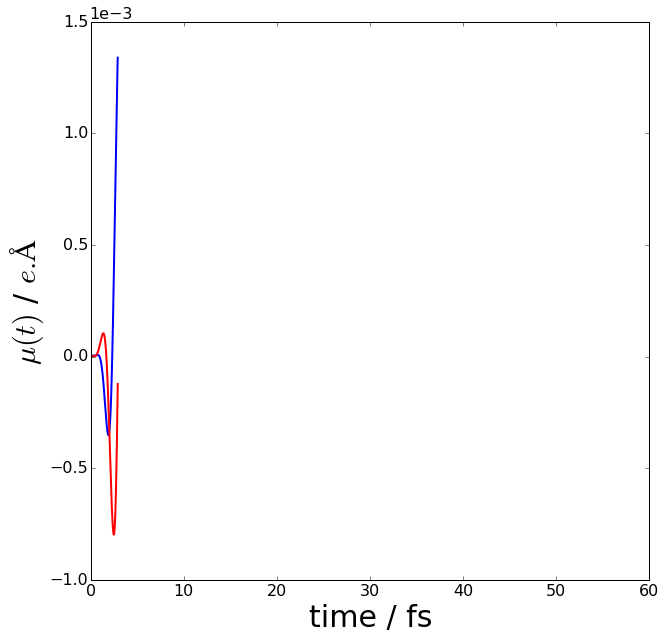

In [5]:
xra = np.linspace(0,xlim,1000)
plt.figure(figsize=(10,10))
plt.plot(time,mux,'-b',label='$\mu_x$',linewidth=2)
plt.plot(time,muy,'-r',label='$\mu_y$',linewidth=2)
#plt.plot(xra,0.001*0.7071*np.sin(xra*1.716/0.65/2./8)**2,'--',color = '0.75',linewidth=2.)
#plt.plot(xra,-0.001*0.7071*np.sin(xra*1.716/0.65/2./8)**2,'--',color = '0.75',linewidth=2.)
plt.xlim(0,60)
plt.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
plt.rc('font', size=16)
plt.xlabel('time / fs',fontsize=30)
plt.ylabel('$\mu(t)$ / $e.\AA$', fontsize=30)
plt.savefig('mu_na.eps')

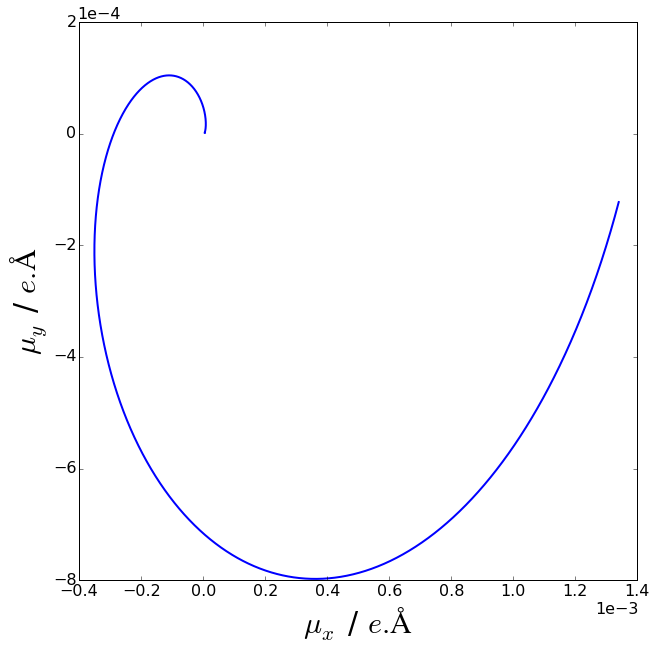

In [6]:
xra = np.linspace(0,xlim,1000)
plt.figure(figsize=(10,10))
plt.plot(mux,muy,'-b',label='$\mu_x$',linewidth=2)
plt.ticklabel_format(axis='both',style='sci', scilimits=(0,0))
plt.rc('font', size=16)
plt.xlabel('$\mu_x$ / $e.\AA$',fontsize=30)
plt.ylabel('$\mu_y$ / $e.\AA$', fontsize=30)
plt.savefig('muboth_na.eps')

In [8]:
dt = time[1]-time[0]
omega = 1.716
onecycle = 2*np.pi*0.65/omega
ncorr = int(onecycle/dt)
print ey[0],ey[ncorr]

0.0 -1.55924708528e-05


In [9]:
def runningMean(x, N):
    y = np.zeros((len(x),))
    for ctr in range(len(x)):
         y[ctr] = np.sum(x[ctr:(ctr+N)])
    return y/N

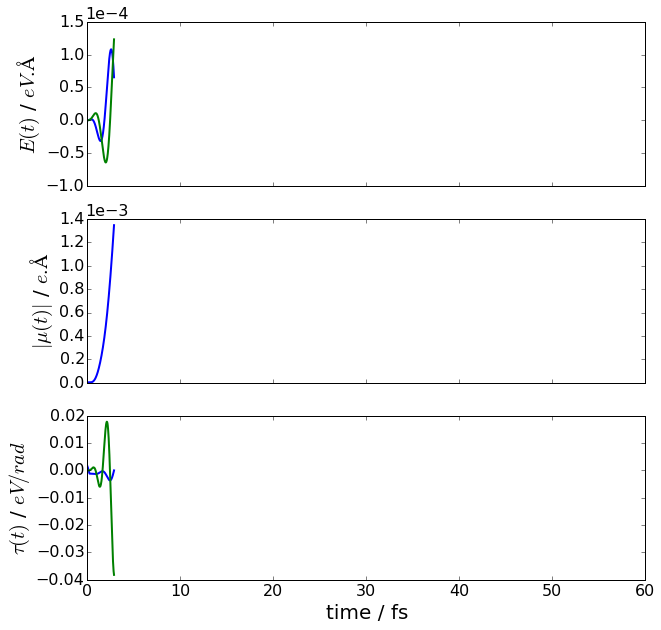

In [10]:
ncorr = int(onecycle/dt)+400
f = plt.figure(figsize=(10,10))
ax = plt.subplot(311)
plt.plot(time, ex,time,ey,linewidth=2)
plt.ylabel('$E(t)$ / $eV.\AA$', fontsize=20)
plt.xlim(0,60)
plt.setp(ax.get_xticklabels(), visible=False)
plt.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
ax = plt.subplot(312, sharex=ax)
plt.plot(time, mu,linewidth=2)
plt.ylabel('$|\mu(t)|$ / $e.\AA$', fontsize=20)
plt.setp(ax.get_xticklabels(), visible=False)
plt.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
ax = plt.subplot(313, sharex=ax)
plt.plot(time, runningMean(torque,ncorr),linewidth=2)
plt.ylabel(r'$\tau(t)$ / $eV/rad$', fontsize=20)
plt.xlabel('time / fs',fontsize=20)
plt.plot(time, torque,linewidth=2)
plt.xlim(0,60)
plt.savefig('fieldmutor_na.eps')



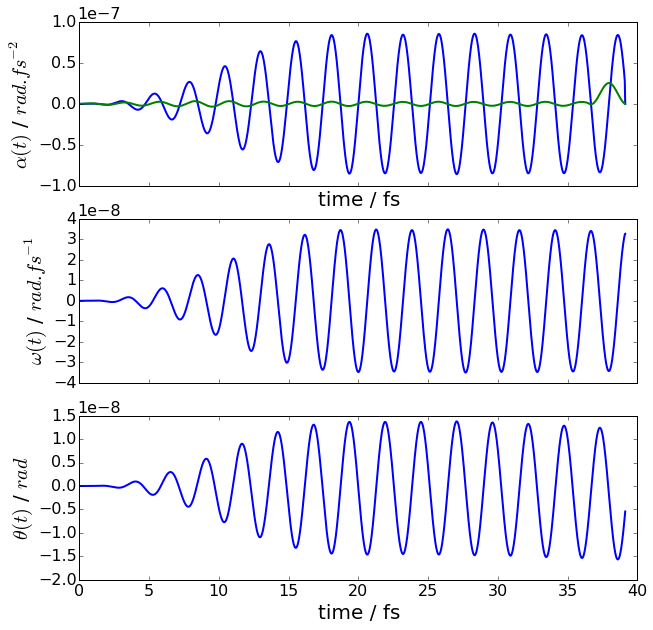

In [11]:
ncorr = int(onecycle/dt)+400
con = 0.658**2
omega = coro.omega
f = plt.figure(figsize=(10,10))
ax = plt.subplot(311)
plt.plot(time, alfa/con,linewidth=2)
plt.plot(time, runningMean(alfa/con,ncorr),linewidth=2)
plt.ylabel(r'$\alpha(t)$ / $rad.fs^{-2}$', fontsize=20)
plt.xlabel('time / fs',fontsize=20)
plt.setp(ax.get_xticklabels(), visible=False)
plt.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
ax = plt.subplot(312, sharex=ax)
plt.plot(time, omega/con,linewidth=2)
plt.ylabel('$\omega(t)$ / $rad.fs^{-1}$', fontsize=20)
plt.setp(ax.get_xticklabels(), visible=False)
plt.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
ax = plt.subplot(313, sharex=ax)
plt.plot(time, theta/con,linewidth=2)
plt.ylabel(r'$\theta(t)$ / $rad$', fontsize=20)
plt.xlabel('time / fs',fontsize=20)
plt.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
plt.savefig('alomtheta.eps')

In [187]:
omega.shape

AttributeError: 'float' object has no attribute 'shape'

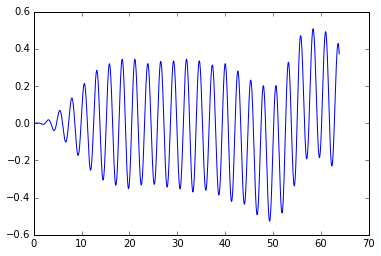

In [4]:
plt.plot(time,torque)

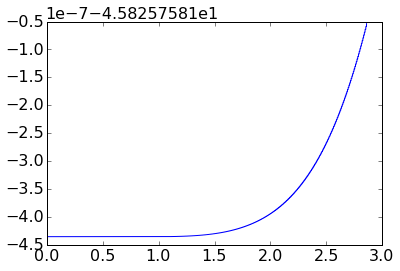

In [12]:
plt.plot(time[:energy.size],energy)

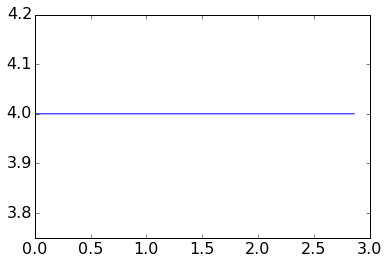

In [11]:
plt.plot(time,charge)

In [18]:
energy.size

59458

In [19]:
time.size

59463

In [14]:
z0 = 0.
x0,y0,ix0,iy0 = octopus.currentXY(path_to_files,0,outputevery,z0,npts=100)

NameError: global name 'xzi' is not defined